In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_excel("./data/groupby.xlsx")
df.info()
print(df.describe())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user id         40 non-null     int64         
 1   account no      40 non-null     object        
 2   transaction id  40 non-null     int64         
 3   type            40 non-null     object        
 4   city            40 non-null     object        
 5   date            40 non-null     datetime64[ns]
 6   amount          40 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.3+ KB
        user id  transaction id        amount
count  40.00000       40.000000     40.000000
mean    4.02500       20.500000  18100.000000
std     4.38814       11.690452  21074.714464
min     1.00000        1.000000   1000.000000
25%     1.00000       10.750000   1500.000000
50%     2.00000       20.500000   2000.000000
75%     5.25000       30.250000  36000.

,user id,account no,transaction id,type,city,date,amount
0,1,a1,1,ibft,karachi,2022-03-01,1000


# Group by

In [5]:
# dataframe.GROUPBY([groupColum1,groupColume2,..]).AGG(['avg','min','max'])

s1 = df.groupby(["city"]).agg(['count'])
s1

,user id,account no,transaction id,type,date,amount
,count,count,count,count,count,count
city,,,,,,
Lahore,9,9,9,9,9,9
islamabad,7,7,7,7,7,7
karachi,24,24,24,24,24,24


In [7]:
# dataframe.GROUPBY([groupColum1,groupColume2,..]).DataFrameColumns.applySeriesMethod
# dataframe.GROUPBY([groupColum1,groupColume2,..])[DataFrameColumns].applySeriesMethod
s2 = df.groupby(['city'])['transaction id'].apply(len)
s2

city
Lahore        9
islamabad     7
karachi      24
Name: transaction id, dtype: int64

In [8]:
# dataframe.GROUPBY([groupColum1,groupColume2,..]).DataFrameColumns.AGG(['avg','min','max'])

s3 = df.groupby(['city'])['transaction id'].agg(['count'])
s3

,count
city,
Lahore,9
islamabad,7
karachi,24


In [11]:
# dataframe.GROUPBY([groupColum1,groupColume2,..]).DataFrameColumns.AGG(['avg','min','max'])
s3 = df.groupby(['city'])['amount'].agg(['count','sum','min','max',np.mean,np.std])
s3

,count,sum,min,max,mean,std
city,,,,,,
Lahore,9,97000,1000,50000,10777.777778,18604.621588
islamabad,7,350000,50000,50000,50000.000000,0.000000
karachi,24,277000,1000,36000,11541.666667,16035.908528


# volume and value based on city and transaction types

In [18]:
# dataframe.GROUPBY([groupColum1,groupColume2,..]).DataFrameColumns.AGG(['avg','min','max'])
s3 = df.groupby(['city','type'])['amount'].agg(['count','sum'])

#                columnname
s3.sort_values(['count'], ascending=False,inplace=True)
s3

count     sum
city      type                
islamabad ibft       7  350000
karachi   rtgs       7  252000
          ibft       6    6000
          topup      6    9000
          ft         5   10000
Lahore    ft         3    6000
          ibft       3   52000
          topup      2    3000
          rtgs       1   36000

In [32]:
# dataframe.GROUPBY([groupColum1,groupColume2,..]).DataFrameColumns.AGG(['avg','min','max'])
s3 = df.groupby(['city','type'])[['amount']].agg(['count','sum'])
s3


amount        
                 count     sum
city      type                
Lahore    ft         3    6000
          ibft       3   52000
          rtgs       1   36000
          topup      2    3000
islamabad ibft       7  350000
karachi   ft         5   10000
          ibft       6    6000
          rtgs       7  252000
          topup      6    9000

# volume and value based on city and transaction types :top 2 from each city

In [ ]:
s3 = df.groupby(['city','type'])['amount'].agg(['count','sum'])
s3

In [33]:
df

,user id,account no,transaction id,type,city,date,amount
0,1,a1,1,ibft,karachi,2022-03-01,1000
1,1,a1,2,ft,karachi,2022-01-05,2000
2,1,a2,3,topup,karachi,2021-06-06,1500
3,1,a2,4,rtgs,karachi,2022-01-05,36000
4,1,a2,5,ibft,islamabad,2021-06-06,50000
5,2,b1,6,ibft,karachi,2022-03-01,1000
6,2,b1,7,ft,karachi,2022-01-05,2000
7,2,b1,8,topup,karachi,2021-06-06,1500
8,2,b1,9,rtgs,karachi,2022-01-05,36000
9,2,b1,10,ibft,islamabad,2021-06-06,50000


# Count unique users based on cities

In [34]:
#dataframe.GROUPBY([groupColum1,groupColume2,..]).DataFrameColumns.applySeriesMethod
df.groupby(['city'])['user id'].unique()

city
Lahore           [6, 2, 5, 1, 8, 10]
islamabad                 [1, 2, 10]
karachi      [1, 2, 5, 9, 21, 8, 12]
Name: user id, dtype: object

In [35]:
df.groupby(['city'])['user id'].unique().apply(len)

city
Lahore       6
islamabad    3
karachi      7
Name: user id, dtype: int64

In [36]:
sbp = np.array([1,5,9,3])
sbp

array([1, 5, 9, 3])

In [40]:
print(np.in1d(sbp,[6, 2, 5, 1, 8, 10]))
print(np.in1d(sbp,[6, 2, 5, 1, 8, 10]).sum())

[ True  True False False]
2


In [45]:
df.groupby(['city'])['user id'].unique().apply(lambda x:type(x))

city
Lahore       <class 'numpy.ndarray'>
islamabad    <class 'numpy.ndarray'>
karachi      <class 'numpy.ndarray'>
Name: user id, dtype: object

In [46]:
def abc(x):
    return x+5

a = lambda x:x+5
a(10)

15

In [47]:
abc(10)

15

In [51]:
df.groupby(['city','type'])['transaction id'].agg(['count'])

count
city      type        
Lahore    ft         3
          ibft       3
          rtgs       1
          topup      2
islamabad ibft       7
karachi   ft         5
          ibft       6
          rtgs       7
          topup      6

# unstack

In [64]:
df.groupby(['city','type'])['transaction id'].agg(['count']).unstack()

count                
type         ft ibft rtgs topup
city                           
Lahore      3.0  3.0  1.0   2.0
islamabad   NaN  7.0  NaN   NaN
karachi     5.0  6.0  7.0   6.0


# groupby and Aggerate functions with datetime

In [53]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user id         40 non-null     int64         
 1   account no      40 non-null     object        
 2   transaction id  40 non-null     int64         
 3   type            40 non-null     object        
 4   city            40 non-null     object        
 5   date            40 non-null     datetime64[ns]
 6   amount          40 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.3+ KB


,user id,account no,transaction id,type,city,date,amount
0,1,a1,1,ibft,karachi,2022-03-01,1000


In [55]:
#date = column 
a = df.groupby([df.date.dt.year])['amount'].agg(['count','sum'])
a

,count,sum
date,,
2021,16,412000
2022,24,312000


In [56]:
a = df.groupby([df.date.dt.month])['amount'].agg(['count','sum'])
a

,count,sum
date,,
1,16,304000
3,8,8000
6,16,412000


In [62]:
a = df.groupby([df.date.dt.year.rename('Y'),
                df.date.dt.month.rename("M")]
              )['amount'].agg(['count','sum']).reset_index()

a.columns = ["Year","Month","Volume",'Value']
a

,Year,Month,Volume,Value
0,2021,6,16,412000
1,2022,1,16,304000
2,2022,3,8,8000


# groupby dattime based on string symbols

In [65]:
a = df.groupby([df.date.dt.strftime("%Y")])['amount'].agg(['count'])
a

,count
date,
2021,16
2022,24


In [67]:
a = df.groupby([df.date.dt.strftime("%Y-%m-%d")])['amount'].agg(['count'])
a

,count
date,
2021-06-06,16
2022-01-05,16
2022-03-01,8


In [70]:
a = df.groupby([df.date.dt.strftime("%d %B %Y")])['amount'].agg(['count'])
a

,count
date,
01 March 2022,8
05 January 2022,16
06 June 2021,16


In [79]:
a = df.groupby([df.date.dt.strftime("%d %B %Y"),'type'])['amount'].agg(['count']).unstack().reset_index()
a.columns = ['transaction date','FT','IBFT','RTGS','Topup']
a

,transaction date,FT,IBFT,RTGS,Topup
0,01 March 2022,NaN,8.0,NaN,NaN
1,05 January 2022,8.0,NaN,8.0,NaN
2,06 June 2021,NaN,8.0,NaN,8.0


In [92]:
a = df.groupby([df.date.dt.year,df.date.dt.quarter,"type"])['amount'].agg(['count']).unstack()
# a.columns = ['transaction date','FT','IBFT','RTGS','Topup']
a

count                
type         ft ibft rtgs topup
date date                      
2021 2      NaN  8.0  NaN   8.0
2022 1      8.0  8.0  8.0   NaN

In [76]:
df[(df['date']=='2022-01-05') & (df['type']=='ft')]

,user id,account no,transaction id,type,city,date,amount
1,1,a1,2,ft,karachi,2022-01-05,2000
6,2,b1,7,ft,karachi,2022-01-05,2000
11,6,d1,12,ft,Lahore,2022-01-05,2000
16,2,b1,17,ft,Lahore,2022-01-05,2000
21,1,a1,22,ft,karachi,2022-01-05,2000
26,2,b1,27,ft,Lahore,2022-01-05,2000
31,1,a1,32,ft,karachi,2022-01-05,2000
36,2,b1,37,ft,karachi,2022-01-05,2000


# Visualization with pandas

<AxesSubplot:xlabel='city'>

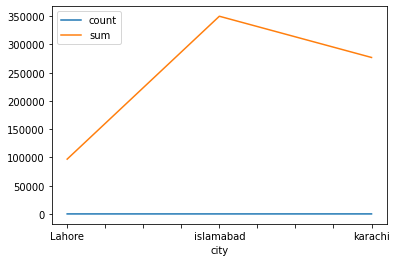

In [94]:
df.groupby(['city'])['amount'].agg(['count','sum']).plot(kind='bar')

<AxesSubplot:xlabel='city'>

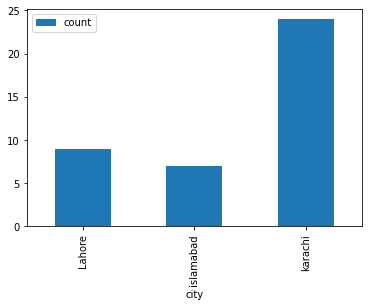

In [96]:
df.groupby(['city'])['amount'].agg(['count']).plot(kind='bar')

<AxesSubplot:xlabel='city'>

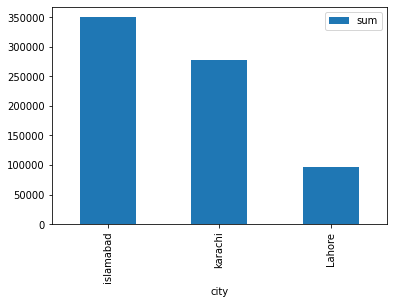

In [100]:
df.groupby(['city'])['amount'].agg(['sum']).sort_values(['sum'], ascending=False).plot(kind='bar')

In [104]:
df.groupby(['city'])['amount'].agg(['sum']).sort_values(['sum'], ascending=False).plot()

Object `plot` not found.


In [ ]:
df.groupby(['city'])['amount'].agg(['sum']).sort_values(['sum'], ascending=False).plot

<AxesSubplot:>

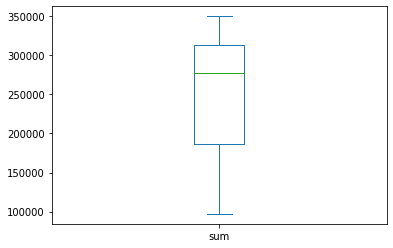

In [109]:
df.groupby(['city'])['amount'].agg(['sum']).plot(kind='box')

# Matplotlib 

In [111]:
import matplotlib.pyplot as plt

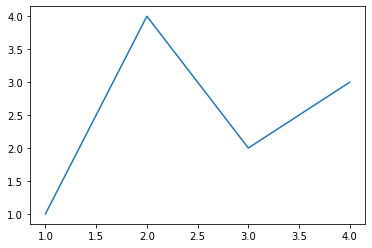

In [113]:
x = [1, 2, 3, 4]
y =[1, 4, 2, 3]

plt.plot(x,y)
plt.show()

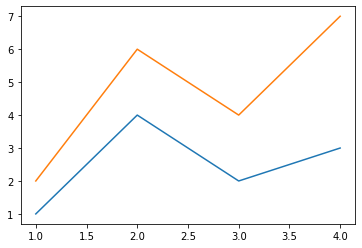

In [114]:
x = [1, 2, 3, 4]
y =[1, 4, 2, 3]
y1 =[2,6,4,7]

plt.plot(x,y)
plt.plot(x,y1)
plt.show()

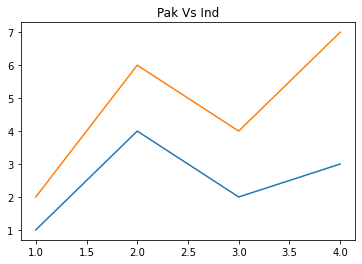

In [115]:
x = [1, 2, 3, 4]
y =[1, 4, 2, 3]
y1 =[2,6,4,7]

plt.title("Pak Vs Ind")
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

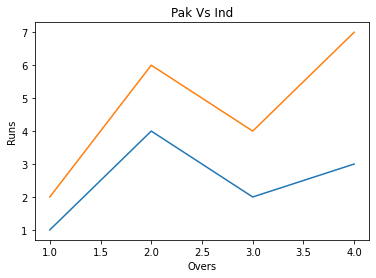

In [116]:
x = [1, 2, 3, 4]
y =[1, 4, 2, 3]
y1 =[2,6,4,7]

plt.title("Pak Vs Ind")
plt.xlabel("Overs")
plt.ylabel("Runs")


plt.plot(x,y)
plt.plot(x,y1)


plt.show()

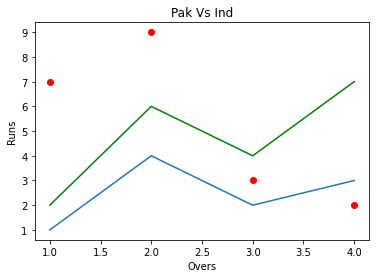

In [120]:
x = [1, 2, 3, 4]
y =[1, 4, 2, 3]
y1 =[2,6,4,7]
y3 = [7,9,3,2]

plt.title("Pak Vs Ind")
plt.xlabel("Overs")
plt.ylabel("Runs")


plt.plot(x,y)
plt.plot(x,y1, color='g')
plt.scatter(x,y3,color='r')


plt.show()

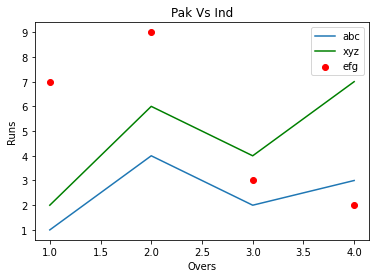

In [127]:
x = [1, 2, 3, 4]
y =[1, 4, 2, 3]
y1 =[2,6,4,7]
y3 = [7,9,3,2]

plt.title("Pak Vs Ind")
plt.xlabel("Overs")
plt.ylabel("Runs")

plt.plot(x,y, label="abc")
plt.plot(x,y1, color='g', label="xyz")
plt.scatter(x,y3,color='r',label='efg')


plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(, );  # Plot some data on the axes.